In [2]:
%matplotlib inline
%time from hikyuu.interactive import *

from pylab import plot

CPU times: total: 0 ns
Wall time: 560 μs


# 示例：通道突破系统

当价格突破20日高点时买入，当价格低于10日低点时卖出。

In [3]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)

In [4]:
my_sys = SYS_Simple(tm=my_tm)

In [5]:
def TurtleSG(self):
     n1 = self.get_param("n1")
     n2 = self.get_param("n2")
     k = self.to
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._add_buy_signal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._add_sell_signal(k[i].datetime)

In [7]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_FixedCount(1000)

s = sm['sz000001']
query = Query(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

In [10]:
calendar = sm.get_trading_calendar(query, 'SZ')
calendar

[Datetime(2001,1,2,0,0,0,0,0), Datetime(2001,1,3,0,0,0,0,0), Datetime(2001,1,4,0,0,0,0,0), Datetime(2001,1,5,0,0,0,0,0), Datetime(2001,1,8,0,0,0,0,0), Datetime(2001,1,9,0,0,0,0,0), Datetime(2001,1,10,0,0,0,0,0), Datetime(2001,1,11,0,0,0,0,0), Datetime(2001,1,12,0,0,0,0,0), Datetime(2001,1,15,0,0,0,0,0), Datetime(2001,1,16,0,0,0,0,0), Datetime(2001,1,17,0,0,0,0,0), Datetime(2001,1,18,0,0,0,0,0), Datetime(2001,1,19,0,0,0,0,0), Datetime(2001,2,5,0,0,0,0,0), Datetime(2001,2,6,0,0,0,0,0), Datetime(2001,2,7,0,0,0,0,0), Datetime(2001,2,8,0,0,0,0,0), Datetime(2001,2,9,0,0,0,0,0), Datetime(2001,2,12,0,0,0,0,0), Datetime(2001,2,13,0,0,0,0,0), Datetime(2001,2,14,0,0,0,0,0), Datetime(2001,2,15,0,0,0,0,0), Datetime(2001,2,16,0,0,0,0,0), Datetime(2001,2,19,0,0,0,0,0), Datetime(2001,2,20,0,0,0,0,0), Datetime(2001,2,21,0,0,0,0,0), Datetime(2001,2,22,0,0,0,0,0), Datetime(2001,2,23,0,0,0,0,0), Datetime(2001,2,26,0,0,0,0,0), Datetime(2001,2,27,0,0,0,0,0), Datetime(2001,2,28,0,0,0,0,0), Datetime(2001,3,1,

In [11]:
x1 = my_tm.get_funds_curve(calendar, Query.DAY)

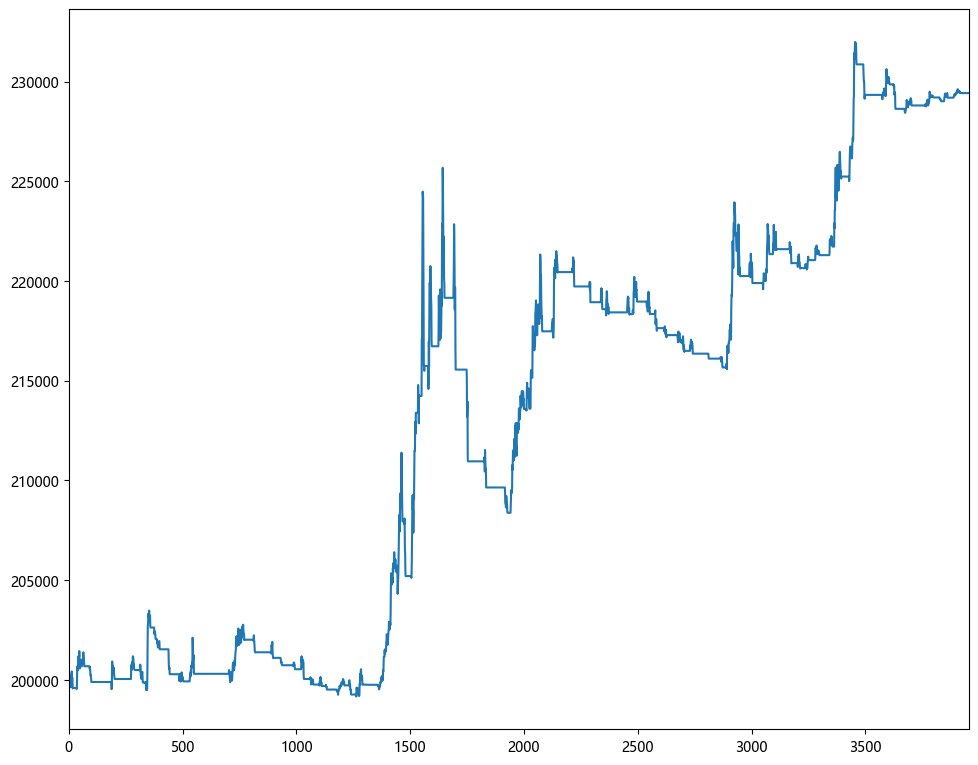

In [12]:
PRICELIST(x1).plot()

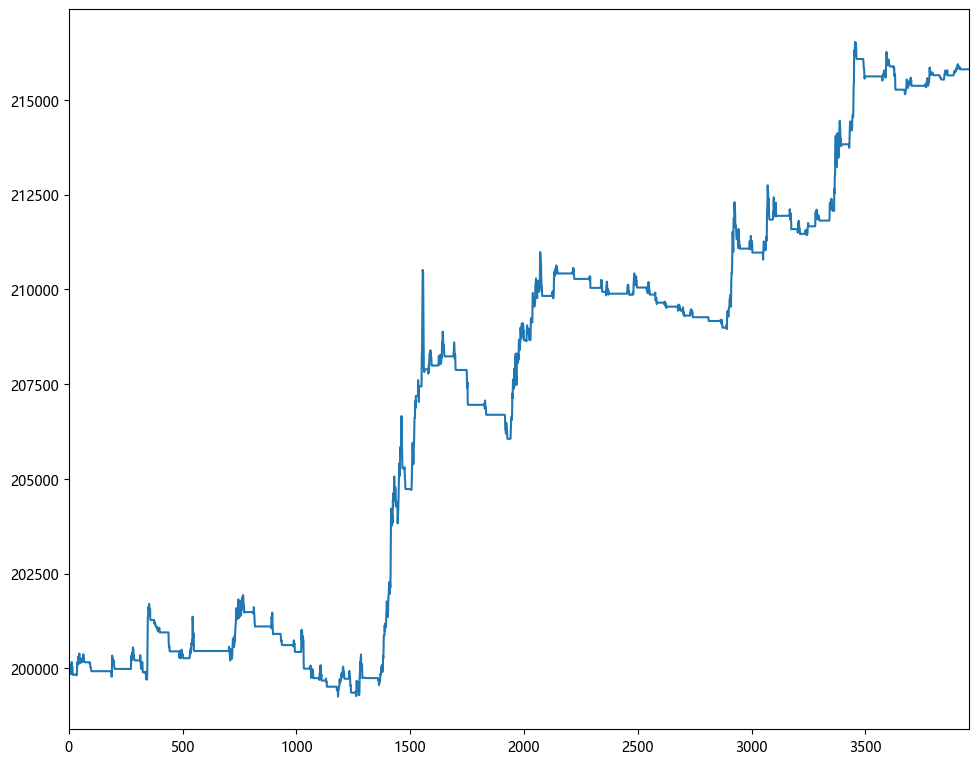

In [13]:
my_sys.mm = MM_FixedPercent(0.03)
my_sys.run(s, query)

x2 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x2).plot()

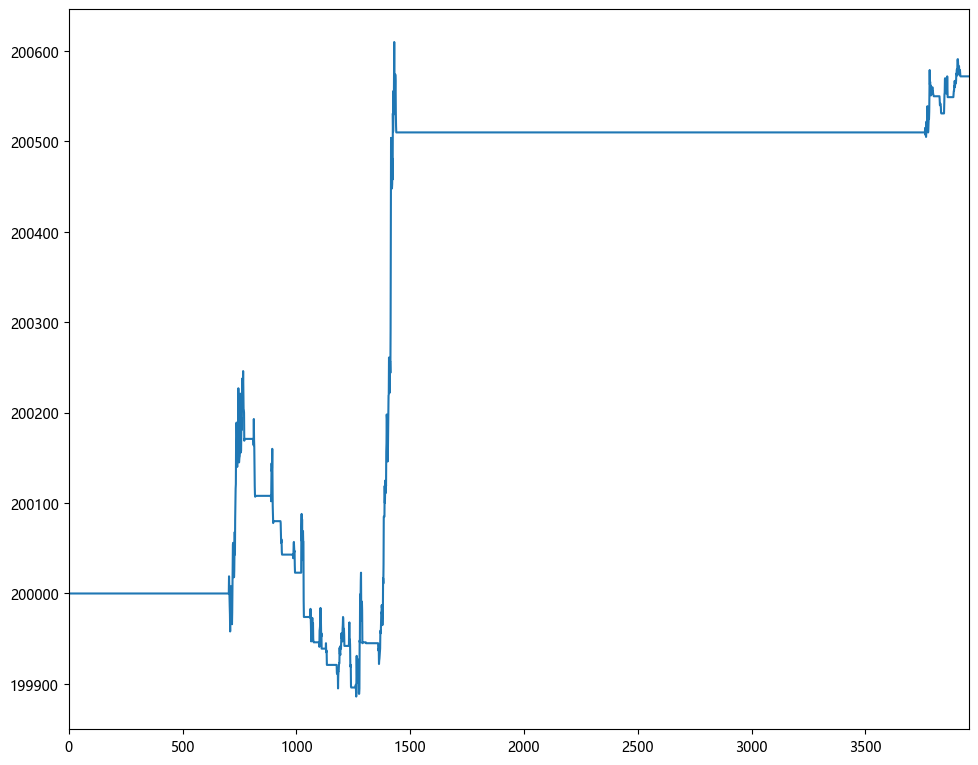

In [14]:
my_sys.mm = MM_FixedRisk(1000)
my_sys.run(s, query)

x3 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x3).plot()

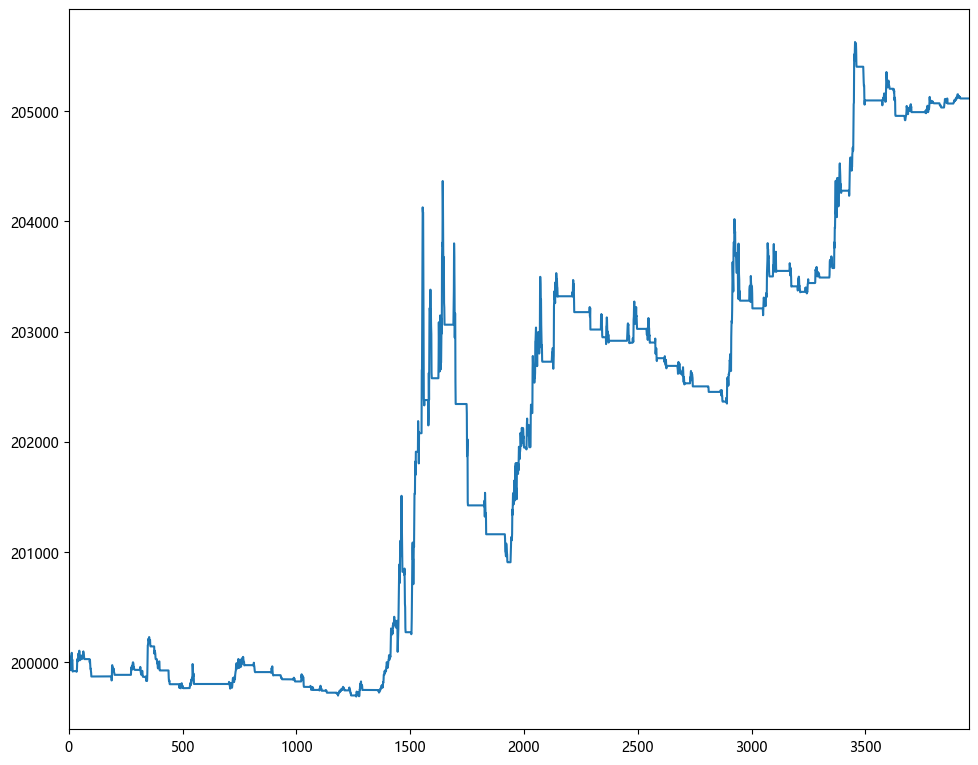

In [15]:
my_sys.mm = MM_FixedCapital(1000)
my_sys.run(s, query)

x4 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x4).plot()

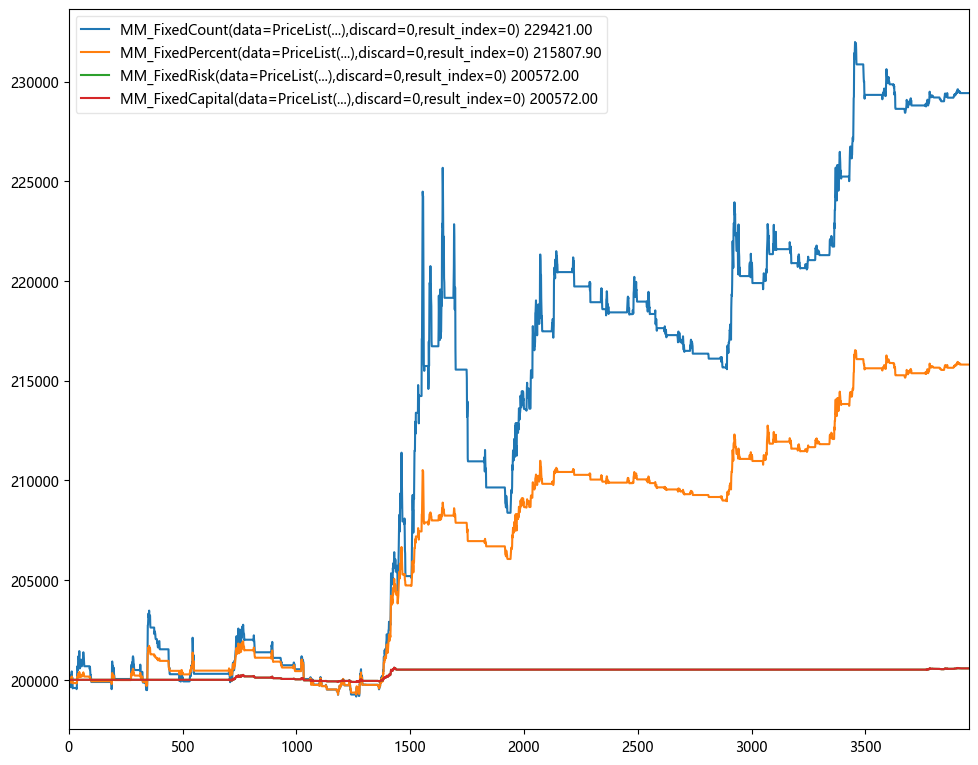

In [16]:
ax = create_figure(1)

def x_plot(x, name, ax):
    px = PRICELIST(x)
    px.name = name
    px.plot(axes=ax, legend_on=True)

x_plot(x1, 'MM_FixedCount', ax)
x_plot(x2, 'MM_FixedPercent', ax)
x_plot(x3, 'MM_FixedRisk', ax)
x_plot(x3, 'MM_FixedCapital', ax)